In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Heart_Disease_Prediction.csv")

In [3]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [5]:
df.rename(columns = {'Heart Disease':'Heart_Disease'}, inplace = True)

In [6]:
df.rename(columns = {'Chest pain type':'Chestpaintype'}, inplace = True)

In [7]:
df.rename(columns = {'BP':'bP'}, inplace = True)

In [8]:
df.rename(columns = {'FBS over 120':'FBSover120'}, inplace = True)

In [9]:
df.rename(columns = {'EKG results':'EKGresults'}, inplace = True)

In [10]:
df.rename(columns = {'Number of vessels fluro':'Numberofvesselsfluro'}, inplace = True)

In [11]:
df.rename(columns = {'ST depression':'STdepression'}, inplace = True)

In [12]:
df.rename(columns = {'Slope of ST':'SlopeofST'}, inplace = True)

In [13]:
df.head()

,Age,Sex,Chestpaintype,bP,Cholesterol,FBSover120,EKGresults,Max HR,Exercise angina,STdepression,SlopeofST,Numberofvesselsfluro,Thallium,Heart_Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [14]:
df.Heart_Disease.value_counts()

Absence     150
Presence    120
Name: Heart_Disease, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   270 non-null    int64  
 1   Sex                   270 non-null    int64  
 2   Chestpaintype         270 non-null    int64  
 3   bP                    270 non-null    int64  
 4   Cholesterol           270 non-null    int64  
 5   FBSover120            270 non-null    int64  
 6   EKGresults            270 non-null    int64  
 7   Max HR                270 non-null    int64  
 8   Exercise angina       270 non-null    int64  
 9   STdepression          270 non-null    float64
 10  SlopeofST             270 non-null    int64  
 11  Numberofvesselsfluro  270 non-null    int64  
 12  Thallium              270 non-null    int64  
 13  Heart_Disease         270 non-null    object 
dtypes: float64(1), int64(12), object(1)
memory usage: 29.7+ KB


In [16]:
df.shape

(270, 14)

In [17]:
df.corr()

,Age,Sex,Chestpaintype,bP,Cholesterol,FBSover120,EKGresults,Max HR,Exercise angina,STdepression,SlopeofST,Numberofvesselsfluro,Thallium
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046
Chestpaintype,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659
bP,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045
Cholesterol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836
FBSover120,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237
EKGresults,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337
Max HR,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397
Exercise angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449
STdepression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333


<AxesSubplot:>

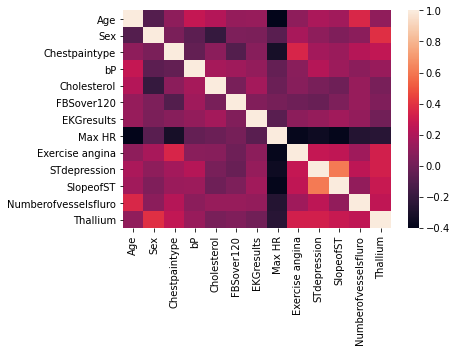

In [18]:
sns.heatmap(df.corr())

In [19]:
df2 = pd.get_dummies(df, columns = ['Heart_Disease'])
df2

,Age,Sex,Chestpaintype,bP,Cholesterol,FBSover120,EKGresults,Max HR,Exercise angina,STdepression,SlopeofST,Numberofvesselsfluro,Thallium,Heart_Disease_Absence,Heart_Disease_Presence
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,0,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,0,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,1,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1,0


In [20]:
y = df2.iloc[:,-1]
y

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: Heart_Disease_Presence, Length: 270, dtype: uint8

In [21]:
x = df.iloc[:,:-1:]
x

,Age,Sex,Chestpaintype,bP,Cholesterol,FBSover120,EKGresults,Max HR,Exercise angina,STdepression,SlopeofST,Numberofvesselsfluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6


<AxesSubplot:xlabel='Age', ylabel='Heart_Disease'>

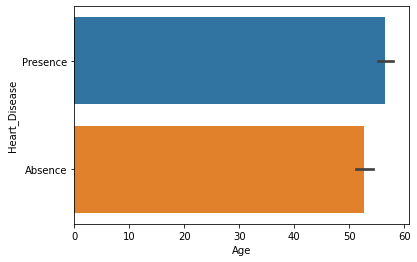

In [22]:
sns.barplot(x='Age',y='Heart_Disease',data=df)

<AxesSubplot:>

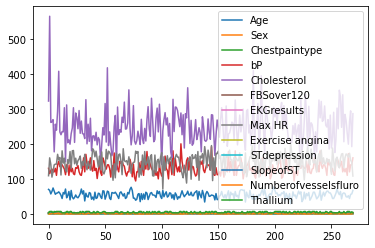

In [23]:
df.plot(kind='line')

In [24]:
#splitting into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [25]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=0)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [26]:
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

In [27]:
from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred)

0.92835625

In [28]:
import pickle

In [29]:
file = open('model.pkl','wb')

In [30]:
pickle.dump(model, file)